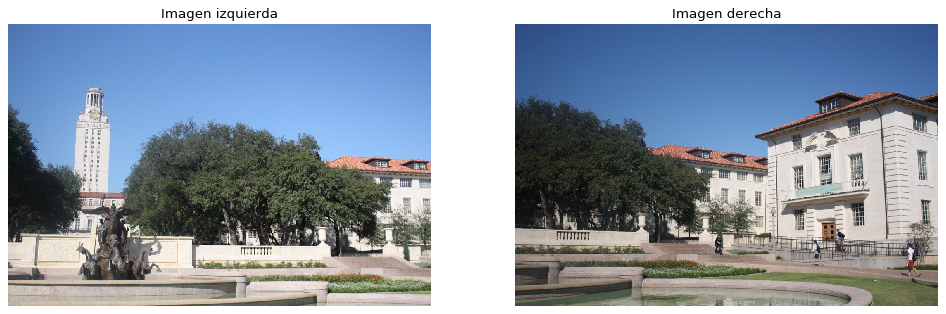

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar ambas imagenes
imgRight = cv2.imread('imgs/Right.jpg')
imgLeft = cv2.imread('imgs/Left.jpg')

# Cambiar a RGB ya que OpenCV carga las imagenes en BGR
imgRight = cv2.cvtColor(imgRight,cv2.COLOR_BGR2RGB)
imgLeft = cv2.cvtColor(imgLeft,cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1),plt.imshow(imgLeft), plt.title('Imagen izquierda')
plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(imgRight), plt.title('Imagen derecha')
plt.axis('off') 
plt.show()


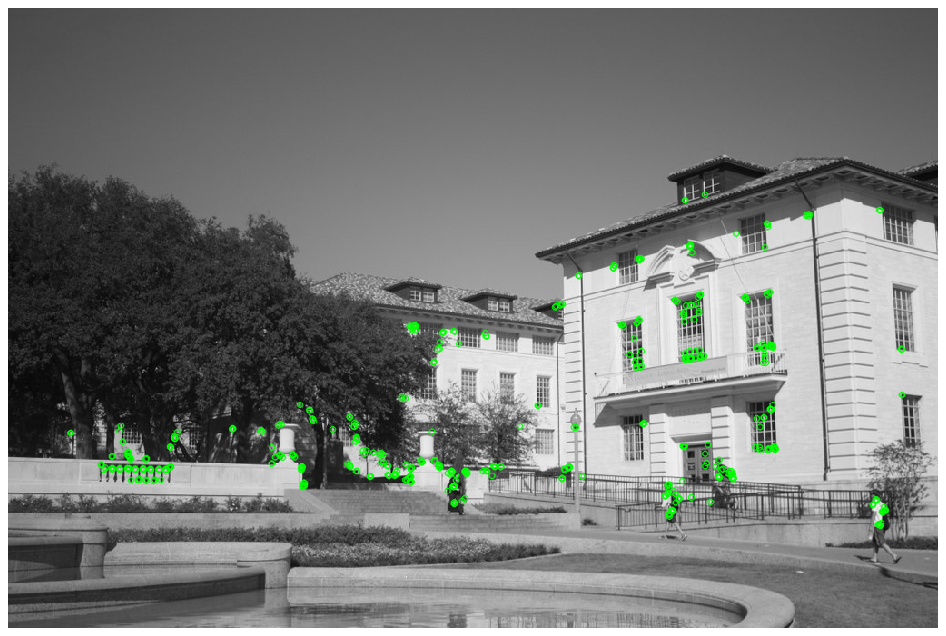

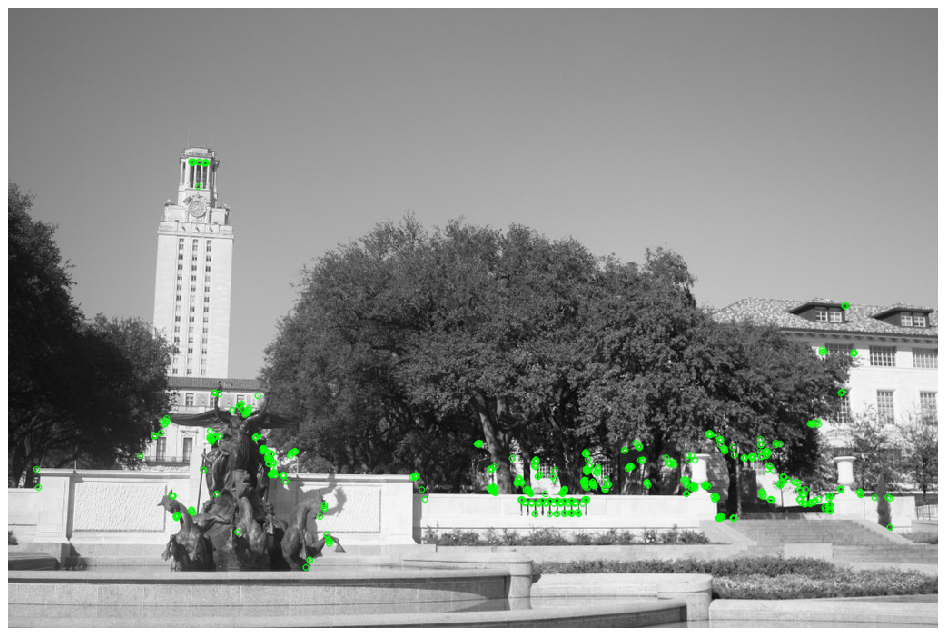

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Se carga la imagen en escala de grises
img = cv2.imread('imgs/Right.jpg',0)

# Se crea el objeto del descriptor
orb = cv.ORB_create()

# Se hallan los puntos de interes (keypoints)
kp = orb.detect(img, None)

# Se calcula el vector de caracteristicas (Features)
kp, des = orb.compute(img, kp)

# Se dibujan en la imagen los keypoints hallados
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.axis('off') 
plt.show()

# Se repite el proceso para la segunda imagen
img = cv2.imread('imgs/Left.jpg',0)
orb = cv.ORB_create()
kp = orb.detect(img, None)
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.axis('off') 
plt.show()

Matches:  36
Matriz de transformacion obtenida usando OpenCV: 
 [[ 7.49025007e-01 -2.31705706e-02  4.53908225e+02]
 [-1.21977656e-01  8.32472487e-01  9.24422645e+01]
 [-1.89626689e-04 -1.18348634e-04  1.00000000e+00]] 



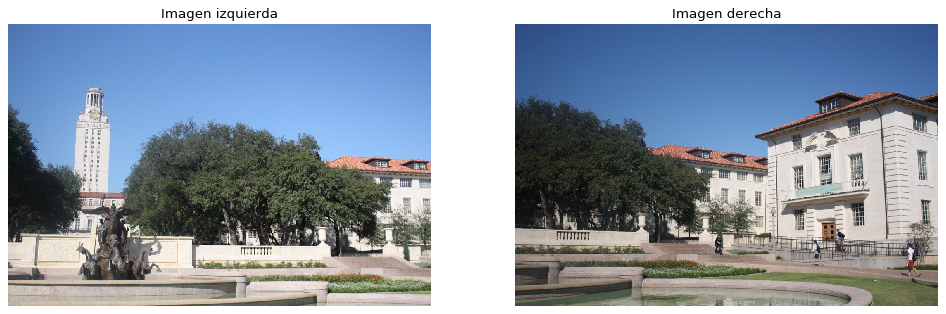

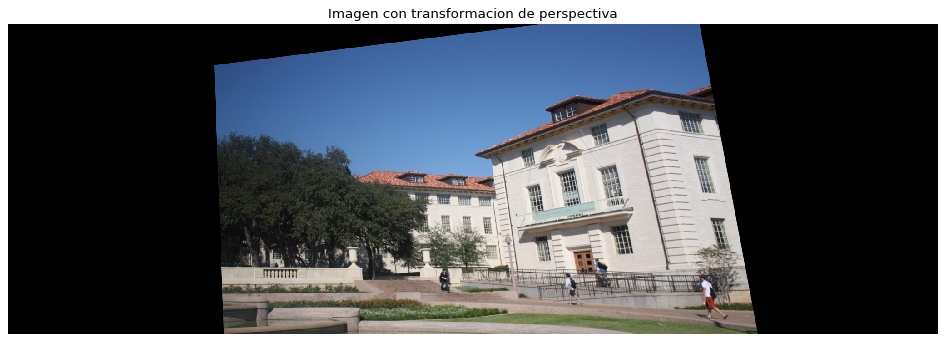

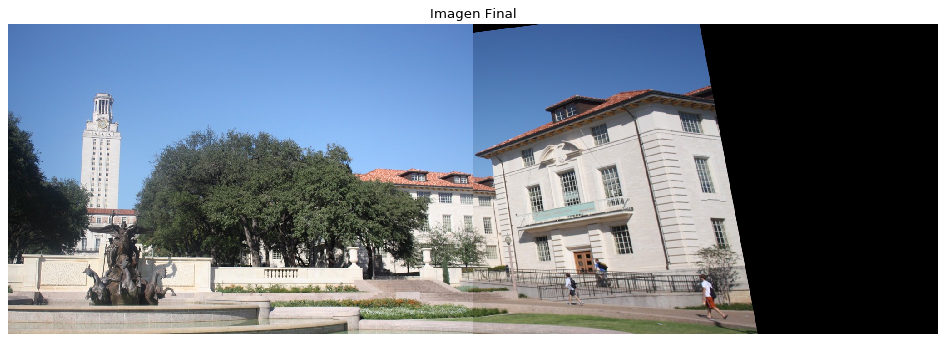

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar ambas imagenes
imgRight = cv2.imread('imgs/Right.jpg')
imgLeft = cv2.imread('imgs/Left.jpg')
imgRight = cv2.cvtColor(imgRight,cv2.COLOR_BGR2RGB)
imgLeft = cv2.cvtColor(imgLeft,cv2.COLOR_BGR2RGB)

# Cambiar a escala de grises para hallar los keypoints
img1 = cv2.cvtColor(imgRight,cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(imgLeft,cv2.COLOR_RGB2GRAY)

# Se crea el objeto del descriptor
orb = cv.ORB_create()

# Se calculan los keypoints y las features
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Crear el objeto para la comparacion de matrices de caracteristicas
# se utiliza el algoritmo de BruteForce
match = cv2.BFMatcher()

# Se comparan los vectores de caracteristicas teniendo en cuenta los dos
# vecinos mas cercanos
matches = match.knnMatch(des1,des2,k=2) 

# Se realiza un recorrido de las parejas de vectores caracteristicas
# para rechazar aquellos que estan demasiado lejos entre si
good = []
FACT_DIST = 0.7
for m,n in matches:
    if m.distance < FACT_DIST*n.distance:
        good.append(m)
        
print("Matches: ", len(good))
        
# Si el numero de parejas de caracteristicas supera un umbral se halla la matriz
# para despues realizar la transformacion de perspectiva
MIN_MATCH_COUNT = 10
M = None
if len(good) > MIN_MATCH_COUNT:
    
    # Se hallan los puntos de los descriptores en las parejas en la primera
    # imagen
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2) # Source points
    
    # Se hallan los puntos de los descriptores en las parejas en la segunda
    # imagen
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2) # Desired points
    
    # Con los anteriores dos arreglos se procede a calcular la matriz de
    # homografia usando la tecnica RANSAC (Random Sample Consensus) debido 
    # a que los puntos en los arreglos tienen coordenadas atipicas (outliers), 
    # es decir que algunos estan muy lejos del resto.
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
else:
    print("Not enought matches are found")

if (M is not None):
    print("Matriz de transformacion obtenida usando OpenCV: \n", M,"\n")
    
    # Mostrar ambas imagenes
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(1,2,1),plt.imshow(imgLeft), plt.title('Imagen izquierda')
    plt.axis('off') 
    plt.subplot(1,2,2),plt.imshow(imgRight), plt.title('Imagen derecha')
    plt.axis('off') 
    plt.show()

    # Se realiza la transformacion de perspectiva
    dst = cv2.warpPerspective(imgRight,M,(imgLeft.shape[1] + imgRight.shape[1], imgLeft.shape[0]))
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(dst), plt.title('Imagen con transformacion de perspectiva')
    plt.axis('off') 
    plt.show()

    # Se cambian los elementos de la izquierda de la imagen final
    # por los de la imagen izquierda para obtener una imagen "panoramica"
    dst[0:imgLeft.shape[0],0:imgLeft.shape[1]] = imgLeft
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(dst), plt.title('Imagen Final')
    plt.axis('off') 
    plt.show()

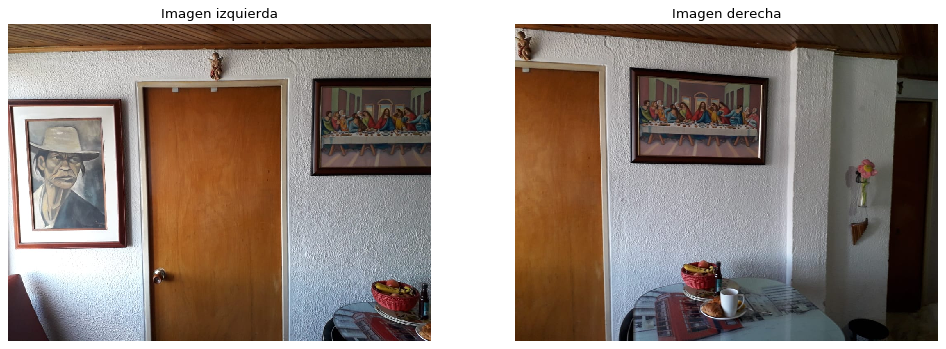

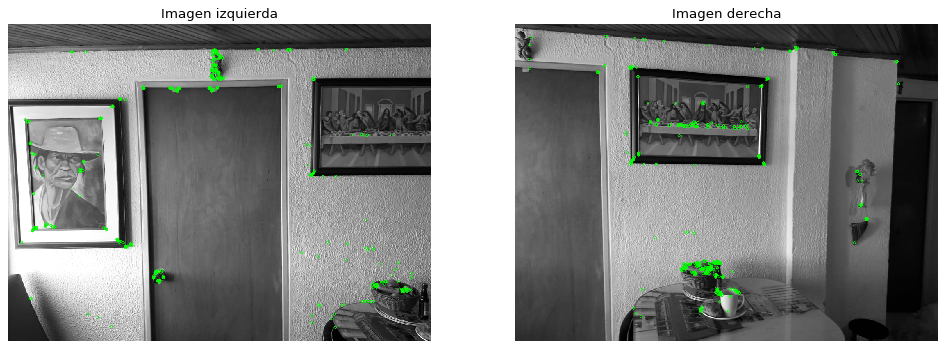

Matches:  15
Matriz de transformacion obtenida usando OpenCV: 
 [[ 7.90206194e-01 -3.65174808e-02  4.79766039e+02]
 [-1.03220081e-01  9.40551058e-01  5.56377339e+01]
 [-1.84941715e-04 -4.92865676e-05  1.00000000e+00]] 



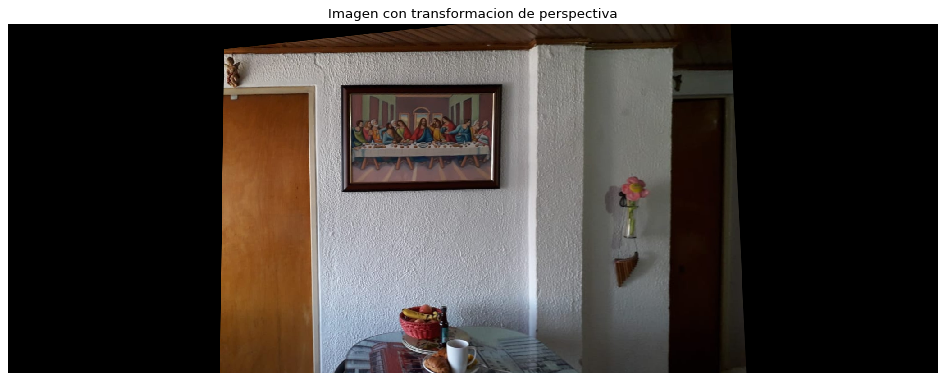

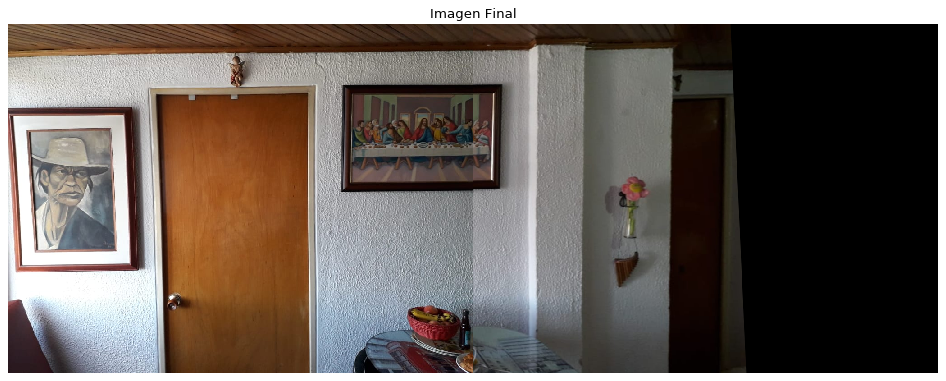

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar ambas imagenes
imgRight = cv2.imread('imgs/RightSala2.jpg')
imgLeft = cv2.imread('imgs/LeftSala.jpg')
imgRight = cv2.cvtColor(imgRight,cv2.COLOR_BGR2RGB)
imgLeft = cv2.cvtColor(imgLeft,cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1),plt.imshow(imgLeft), plt.title('Imagen izquierda')
plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(imgRight), plt.title('Imagen derecha')
plt.axis('off') 
plt.show()

# Cambiar a escala de grises para hallar los keypoints
img1 = cv2.cvtColor(imgRight,cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(imgLeft,cv2.COLOR_RGB2GRAY)

# Se crea el objeto del descriptor
orb = cv.ORB_create()

# Se calculan los keypoints y las features
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Se dibujan en la imagen los keypoints hallados
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
img2_kp_draw = cv.drawKeypoints(img2.copy(), kp2, None, color=(0,255,0), flags=0)
plt.subplot(1,2,1),plt.imshow(img2_kp_draw), plt.title('Imagen izquierda')
plt.axis('off') 

img1_kp_draw = cv.drawKeypoints(img1.copy(), kp1, None, color=(0,255,0), flags=0)
plt.subplot(1,2,2),plt.imshow(img1_kp_draw), plt.title('Imagen derecha')
plt.axis('off') 
plt.show()

# Crear el objeto para la comparacion de matrices de caracteristicas
# se utiliza el algoritmo de BruteForce
match = cv2.BFMatcher()

# Se comparan los vectores de caracteristicas teniendo en cuenta los dos
# vecinos mas cercanos
matches = match.knnMatch(des1,des2,k=2) 

# Se realiza un recorrido de las parejas de vectores caracteristicas
# para rechazar aquellos que estan demasiado lejos entre si
good = []
FACT_DIST = 0.8
for m,n in matches:
    if m.distance < FACT_DIST*n.distance:
        good.append(m)
        
print("Matches: ", len(good))
        
# Si el numero de parejas de caracteristicas supera un umbral se halla la matriz
# para despues realizar la transformacion de perspectiva
MIN_MATCH_COUNT = 10
M = None
if len(good) > MIN_MATCH_COUNT:
    
    # Se hallan los puntos de los descriptores en las parejas en la primera
    # imagen
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2) # Source points
    
    # Se hallan los puntos de los descriptores en las parejas en la segunda
    # imagen
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2) # Desired points
    
    # Con los anteriores dos arreglos se procede a calcular la matriz de
    # homografia usando la tecnica RANSAC (Random Sample Consensus) debido 
    # a que los puntos en los arreglos tienen coordenadas atipicas (outliers), 
    # es decir que algunos estan muy lejos del resto.
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
else:
    print("Not enought matches are found")

if (M is not None):
    print("Matriz de transformacion obtenida usando OpenCV: \n", M,"\n")

    # Se realiza la transformacion de perspectiva
    dst = cv2.warpPerspective(imgRight,M,(imgLeft.shape[1] + imgRight.shape[1], imgLeft.shape[0]))
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(dst), plt.title('Imagen con transformacion de perspectiva')
    plt.axis('off') 
    plt.show()

    # Se cambian los elementos de la izquierda de la imagen final
    # por los de la imagen izquierda para obtener una imagen "panoramica"
    dst[0:imgLeft.shape[0],0:imgLeft.shape[1]] = imgLeft
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(dst), plt.title('Imagen Final')
    plt.axis('off') 
    plt.show()